# Assignment I

# Q2

Solve the following matrix using simultaneous equations in
python

x + y + z = 6

2y + 5z = -4

2x + 5y -z = 27

In [98]:
# define the equation as matrices, which will help solve this question:

i = [[1,1,1],[0,2,5],[2,5,-1]]
j = [6,-4,27]

In [14]:
# import python numpy module
import numpy as np

In [118]:
# declare our arrays as multi dimentional numpy arrays:
i=np.array([[1,1,1],[0,2,5],[2,5,-1]])
j=np.array([6,-4,27])

In [120]:
# use linear algebra module to solve the functions:
x = np.linalg.solve(i,j)
print(x)

#This is our final solution
#Where [5,3,2] can be read as scalar values as

# x =5, y = 3, z = -2

[ 5.  3. -2.]


In [46]:
# now to verify if our solution is correct.
# find dot product of i and x

#np.dot - dot product of two cordinate verctors to find a scalar value
sol = np.dot(a,x);

print(sol)

[ 6. -4. 27.]


In [121]:
#np.allclose - to check if all elements in two arrays are equal.

#so in this case both sol and J are same, expected output is True

np.allclose(sol,j)

True

# Q3

The following dataset of size n = 31 provides employee-wise salary. 
The variables are y = salary of an individual employee and x = years of experience of each individual employee . 
Find the intercept, coefficient value and error term for this regression problem in Python. 
How would you convey (interpret) these results in a business context?

In [122]:
#lets import all the required modules
import pandas as pd  
# numpy is already imported as np 

# for plotting a graph
import matplotlib.pyplot as plt

# for splitting the data into train and test.
from sklearn.model_selection import train_test_split

# to create a model for linear regression
from sklearn.linear_model import LinearRegression

# to tell jupyter to display graphs inline
%matplotlib inline

In [124]:
# download the dataset to the working directory:
#In this case the dataset is stored in below directory:

#To execute the below python implementation, please change the path to the appropriate 
#directory in the "path" variable to run the program:

path = "C:\\Users\\yasha\\Desktop\\BITS\\Assignement1\\"
file = "Salary_Data.csv"
filepath=path+file

# display path
print(filepath)

C:\Users\yasha\Desktop\BITS\Assignement1\Salary_Data.csv


In [125]:
# read the data from csv from a panda function read_csv
# store the data in a data frame, call it salary data
salarydata = pd.read_csv(filepath)

In [136]:
# get an idea of how many rows and colums are existing in the dataframe:
salarydata.shape

(30, 2)

In [127]:
# take a glimpse of the top 5 rows of the data:
salarydata.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [129]:
# lets see some statiscal details of our dataset:
salarydata.describe()

,YearsExperience,Salary
count,30.000000,30.000000
mean,5.313333,76003.000000
std,2.837888,27414.429785
min,1.100000,37731.000000
25%,3.200000,56720.750000
50%,4.700000,65237.000000
75%,7.700000,100544.750000
max,10.500000,122391.000000


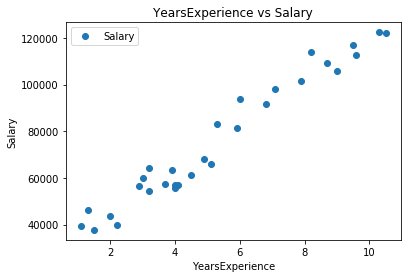

In [130]:
# lets visualise this in a graph:
# although not mandatory but for undertsanding the dataset better.

salarydata.plot(x='YearsExperience',y='Salary', style='o') 
plt.title('YearsExperience vs Salary')  
plt.xlabel('YearsExperience')  
plt.ylabel('Salary')  
plt.show()


In [131]:
# store the values from the dataframe in different arrays.

# using reshape(-1,1), so that we store it as a 2 dimensional array, so that we can fit a model for linear regression

a = salarydata['YearsExperience'].values.reshape(-1,1)
b = salarydata['Salary'].values.reshape(-1,1)


In [132]:
# lets split the data so that we can train our model and also test the same
# we will take 20% (test_size=0.2) of our data as test data

a_train, a_test, b_train, b_test = train_test_split(a, b, test_size=0.2, random_state=0)

In [133]:
# now lets train our model

# create an instance of Linear regression class 
linreg = LinearRegression() 

#trainign the algorithm, with training data
linreg.fit(a_train, b_train) 

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [135]:
# lets find the intercept and slope

# intercept:
intr = linreg.intercept_ 

# slope/coefficent:
coef = linreg.coef_


print("Intercept = ",intr)
print("Slope = ",coef)

Intercept =  [26780.09915063]
Slope =  [[9312.57512673]]


In [84]:
# we can now predit, since we have trained our model:
b_pred = linreg.predict(a_test)

In [137]:
# now we can compare the values

# since b_test, b_pred are 2-Dimensional arrays, we need to flatten them to save to a new data frame.
b_test_flat = b_test.flatten()
b_pred_flat = b_pred.flatten()

pred_salarydata = pd.DataFrame({'Actual Salary': b_test_flat, 'Predicted Salary': b_pred_flat})

print(pred_salarydata)

   Actual Salary  Predicted Salary
0        37731.0      40748.961841
1       122391.0     122699.622956
2        57081.0      64961.657170
3        63218.0      63099.142145
4       116969.0     115249.562855
5       109431.0     107799.502753


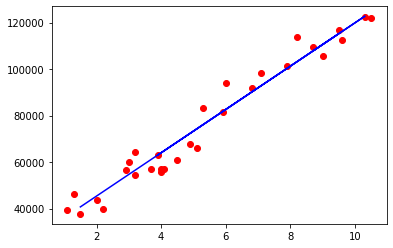

In [138]:
# plot our new predicted line with the original data

plt.scatter(a, b,  color='red')
plt.plot(a_test, b_pred, color='blue')
plt.show()

In [97]:
# time to find error of our predicted model

# Mean Absolute Error:
MSA = metrics.mean_absolute_error(b_test, b_pred)

# Mean Squared Error:
MSE =  metrics.mean_squared_error(b_test, b_pred)

# Root Mean Squared Error:
RMSE = np.sqrt(MSE)


print('Mean Absolute Error = ', MSA)  
print('Mean Squared Error = ', MSE)  
print('Root Mean Squared Error = ', RMSE)

Mean Absolute Error =  2446.1723690465064
Mean Squared Error =  12823412.298126562
Root Mean Squared Error =  3580.979237321345


To explain the business context i would be using the below.
Intercept, Slope/Coefficient and RMSE for Error.

# Intercept = Intercept mathematically can be called as the point of Y, plotted agains a value of  x when its value is Zero.
In our case, when x = 0, means the candidate or employee has not experience or a fresher, we can predict his/her salary would be
approximately 26780.

Tells us a hypothetical point when the X = 0, may or may not be useful or significant always.

# Slope = Slope or Co-efficient is basically  the unit change in Y, for every unit change in X.
So in our case, for increase in one unit change in years of experience, there is an increase in salary of 9312.6 units 

Slope tells us the unit change of Y, we get per unit change in X.

# Error = The average mean difference between the predicted salary and the actual salary of the test data
In our case we used RMSE method, which has an error of around 3581 units, which can be explained as the predicted salary ,may have a variance of upto 3581 units.

Error tells us approximate error between predicted and actual values.

###############################################END############################################################################

In [117]:
# Alernate approch to find wihtout training the data would be as below

# using scipy module:
from scipy import stats

# we need a 1-D array for this funciton.
an = a.flatten()
bn = b.flatten()

slope, intercept, r_value, p_value, std_err = stats.linregress(an,bn)

print('Intercept = ', intercept)  
print('Slope = ', slope)  
print('Error ', std_err)

Intercept =  25792.20019866868
Slope =  9449.96232145508
Error  378.75457423882153
